In [0]:
from __future__ import print_function
import os
import  numpy  as  np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import *

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras import backend as K

Using TensorFlow backend.


**Coco DataSet Extraction**

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

import os
import json
from collections import defaultdict
from pycocotools.coco import COCO
from tqdm import tqdm
from shutil import copyfile
import csv

from keras.applications.vgg16 import VGG16
from keras.models import Model


# Visualization of Layers

In [0]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape,biases.shape)

block1_conv1 (3, 3, 3, 64) (64,)
block1_conv2 (3, 3, 64, 64) (64,)
block2_conv1 (3, 3, 64, 128) (128,)
block2_conv2 (3, 3, 128, 128) (128,)
block3_conv1 (3, 3, 128, 256) (256,)
block3_conv2 (3, 3, 256, 256) (256,)
block3_conv3 (3, 3, 256, 256) (256,)
block4_conv1 (3, 3, 256, 512) (512,)
block4_conv2 (3, 3, 512, 512) (512,)
block4_conv3 (3, 3, 512, 512) (512,)
block5_conv1 (3, 3, 512, 512) (512,)
block5_conv2 (3, 3, 512, 512) (512,)
block5_conv3 (3, 3, 512, 512) (512,)


In [0]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
filters.shape,biases.shape

((3, 3, 3, 64), (64,))

In [0]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

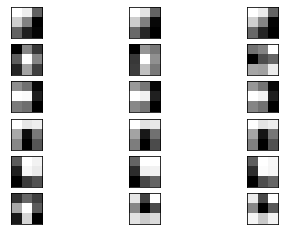

In [0]:
from matplotlib import pyplot

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link  = 'https://drive.google.com/open?id=12iTCBVkRw82Zs53r_0aUpQ68XsM4nShJ'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bird.jpg') 

In [0]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [0]:
len(model.layers)

23

In [0]:
import os

In [0]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np


Using TensorFlow backend.


In [0]:
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [0]:
#load the image with the required shape
img = load_img('/content/bird.jpg', target_size=(200, 200))

#convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

#preprocess and get feature maps
img = preprocess_input(img)




In [0]:
fmap = feature_maps[4]
ix = 256
idx = 0
for i in range(16):
  plt.figure(figsize=(30,30))
  for j in range(8):
    ax = plt.subplot(16,8,idx+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(fmap[0,:,:,ix])
    idx+=1
    ix+=1
plt.show()
  

In [0]:
import os
import cv2
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import Model

#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

# --- PARAMETERS --------------------------------------------------------------

image_dims = (200, 200, 3) #Normalized image size
n_epochs = 100
batch_size = 64
loss="binary_crossentropy"
optimizer="adam"


# --- DEFINING THE ARCHITECTURE -----------------------------------------------


inputLayer = Input(shape = image_dims)
e1 = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding='same')(inputLayer) # Padding=same important to maintain reconstrction
e2 = MaxPooling2D(pool_size = (2, 2))(e1)
e3 = Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding='same')(e2)
e4 = MaxPooling2D(pool_size = (2, 2))(e3)
e5 = Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding='same')(e4)
e6 = MaxPooling2D(pool_size = (2, 2))(e5)

d1 = Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding='same')(e6)
d2 = UpSampling2D(size = (2, 2))(d1)
d3 = Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding='same')(d2)
d4 = UpSampling2D(size = (2, 2))(d3)
d5 = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding='same')(d4)
d6 = UpSampling2D(size = (2, 2))(d5)
outLayer = Conv2D(filters = image_dims[2], kernel_size = (3, 3), activation = 'sigmoid', padding='same')(d6)


# CREATING AUTOENCODER MODEL INSTANCE
# Autoencoder Model
autoencoder = Model(inputLayer, outLayer)

# Encoder Model
encoder = Model(inputLayer, e6)

input_encoder_shape = encoder.layers[0].input_shape[1:]
output_encoder_shape = encoder.layers[-1].output_shape[1:]

# Decoder Model - For producing regenerated images from the autoencoder features
decoded_input = Input(shape=output_encoder_shape)
decoded_output = autoencoder.layers[-7](decoded_input)  # Conv2D
decoded_output = autoencoder.layers[-6](decoded_output)  # UpSampling2D
decoded_output = autoencoder.layers[-5](decoded_output)  # Conv2D
decoded_output = autoencoder.layers[-4](decoded_output)  # UpSampling2D
decoded_output = autoencoder.layers[-3](decoded_output)  # Conv2D
decoded_output = autoencoder.layers[-2](decoded_output)  # UpSampling2D
decoded_output = autoencoder.layers[-1](decoded_output)  # Conv2D

decoder = Model(decoded_input, decoded_output)

#############################################
# Training the model
#############################################

autoencoder.compile(loss=loss, optimizer=optimizer)

t0 = time.time()

--------------------------#Get the each epoch each img visualization Darshan Solanki Code-------------------------------------

#Imports


from keras.callbacks import ModelCheckpoint

filepath="/content/weights.best.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_weights_only=True, mode='max',period=1)
callbacks_list = [checkpoint]

autoencoder.fit(x=X_train, y=X_train,
                             epochs = n_epochs,
                             batch_size = batch_size,
                             shuffle = True,
                             validation_split=0.1,callbacks = callbacks_list)

t99 = time.time()
print('No GPU Time Taken = ', (t99-t0)/60)
#model.save_models()


# SAVING MODEL
if False:
    autoencoder.save("autoencoderParams.h5")
    encoder.save("encoderParams.h5")
    decoder.save("decoderParams.h5")



# LOADING MODEL
if False:
    autoencoder2 = tf.keras.models.load_model("autoencoderParams.h5")
    encoder2 = tf.keras.models.load_model("encoderParams.h5")
    decoder2 = tf.keras.models.load_model("decoderParams.h5")
    autoencoder2.compile(optimizer=optimizer, loss=loss)
    encoder2.compile(optimizer=optimizer, loss=loss)
    decoder2.compile(optimizer=optimizer, loss=loss)
    #z_train=encoder2.predict(X_train)
    #z_train = z_train.reshape((-1, np.prod(output_shape_model)))
    #z_test=encoder2.predict(X_test)
    #z_test = z_test.reshape((-1, np.prod(output_shape_model)))
    
    
    
# Generating the TRAIN and TEST features from the trained encoder

ae_feats_train = encoder.predict(X_train)
ae_feats_train_flat = ae_feats_train.reshape((-1, np.prod(output_shape_model)))


ae_feats_test = encoder.predict(X_test)
ae_feats_test_flat = ae_feats_test.reshape((-1, np.prod(output_shape_model)))


print(ae_feats_train_flat.shape)
print(ae_feats_test_flat.shape)




# Plotting each Layer Feature Maps

**Load the X_train / Xtest images to do the prediction**
**Demoed one of the dog images to showcase the workflow**

In [0]:

#Code for encoder visualization for each convolution layer

#-----Libary Imports----------

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt


#This are indexes of each layer, can be calculated from 
#encoder.summary()
#Included maxpooling layers as well

ixs = [1,2,3,4,5]
outputs = [encoder.layers[i].output for i in ixs]
model = Model(inputs=encoder.inputs, outputs=outputs)

#Demo image

img = load_img('/content/000000362567.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)

#Predicting feature maps for each layer (including max pooling) of encoder
feature_maps = model.predict(img)

In [0]:
#Plot feature maps 

def plottingFeatureMaps(feature_maps):
  square = 4
  block_count = 1
  for fmap in feature_maps:
    print(fmap.shape)
    ix = 1
    for _ in range(2):
      plt.figure(figsize=(10,10))
      for _ in range(4):
        ax = plt.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(fmap[0,:,:,ix-1])
        ix+=1
    print(f'------------------Block {block_count} Completed  ---------------------')
    block_count+=1
    plt.show()

plottingFeatureMaps(feature_maps)
  

# Per Image Deep Tracker

**Load the per epoch model for autoencoders as training is done by this**<br>
**Can be performed on X_test also if the validation data is given while training**

In [0]:


import collections
import os

dict_ = collections.defaultdict(list)

for i in range(len(x_train[0:10])):
  img = x_train[i]
  img = np.expand_dims(img,axis=0)
  accuracy = []
  for j in os.listdir('.'):
    if('weights.best' in j):
      model.load_weights(j)
      y_pred = model.predict(img)
      max_idx = np.argmax(y_pred,axis=-1)
      accuracy.append(y_pred[0][max_idx[0]])
  
  #keys will be image_name and values will be accuracy score for all epochs
  dict_[i] = [accuracy]

In [0]:
import pandas as pd
import seaborn as sns

df_perImagePlot = pd.DataFrame()

images_names = []
series_object = []
epochs_tracker = []
num_epochs = epochs

for k,v in dict_.items():
  images_names.extend([k]*num_epochs)
  series_object.append(pd.Series(v))
  epochs_tracker.extend([*range(1,num_epochs+1)])

df_perImagePlot = pd.concat(series_object, axis=0).reset_index()
df_perImagePlot.rename(columns={0:'Accuracy'},inplace=True)
df_perImagePlot['epochs'] = epochs_tracker
df_perImagePlot['Images'] = images_names
df_perImagePlot.drop('index',axis=1,inplace=True)

In [0]:
#My Idea
df2 = df_perImagePlot.pivot('Images','epochs','Accuracy')
ax = sns.heatmap(df2,cmap="YlGnBu")

#Two ways viz Gromit's idea
df2 = df_perImagePlot.pivot('Images','Accuracy','epochs')
ax = sns.heatmap(df2,cmap="YlGnBu",cbar_kws={'ticks':[range(1,num_epochs+1)]})

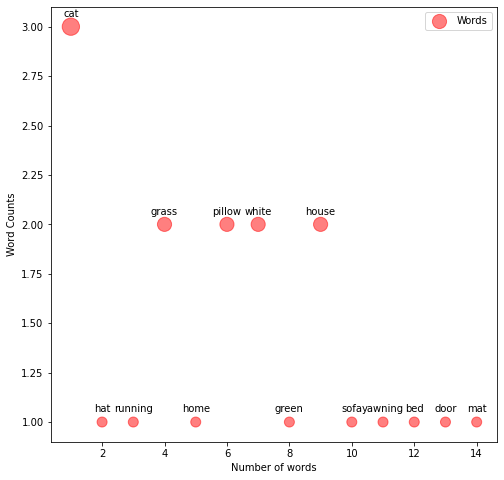

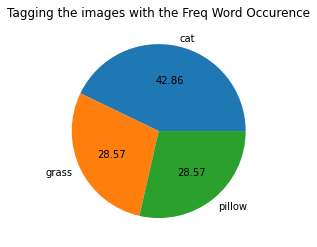

In [0]:
from collections import Counter 

def countWordPlot(caps):

  corpus = []
  for tokens in caps:
    corpus.extend(tokens)

  dict_wc = {}

  for word in corpus:
    if(word in dict_wc):
      dict_wc[word] +=1
    
    else:
      dict_wc[word] = 1


  tag = sorted(dict_wc.items(),key = lambda x: x[1],reverse=True)
  tag_name = []
  tag_count = []

  for t in tag[:3]:
    tag_name.append(t[0])
    tag_count.append(t[1])

  x_axis = [*range(1,len(dict_wc)+1)]
  y_axis = list(dict_wc.values())
  z_axis = [i*100 for i in y_axis]
  labels = list(dict_wc.keys())

  #use the scatter function
  plt.figure(figsize=(8,8))
  plt.scatter(x_axis, y_axis, s=z_axis, alpha=0.5,c='red',label='Words')
  plt.xlabel('Number of words')
  plt.ylabel('Word Counts')
  plt.legend()

  j = 0
  for x,y in zip(x_axis,y_axis):

      label = labels[j]

      # this method is called for each point
      plt.annotate(label, # this is the text
                  (x,y), # this is the point to label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center') # horizontal alignment can be left, right or center
      j+=1

  plt.show()

  #Tagging the image
  plt.title('Tagging the images with the Freq Word Occurence')
  plt.pie(tag_count, labels=tag_name, autopct='%.2f')
  plt.show()


caps = [['cat','hat','running','grass','home','pillow'],['cat','white','green','house','sofa'],['white','yawning','house','bed','cat'],['door','mat','grass','pillow']]
countWordPlot(caps)

In [6]:

import re
import numpy as np
import os
import json
from PIL import Image
from collections import defaultdict
from pycocotools.coco import COCO
import json
import tensorflow as tf
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [7]:
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                          cache_subdir=os.path.abspath('.'),
                                          origin = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip',
                                          extract = True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2017.json'
  os.remove(annotation_zip)

# Download image files

image_folder = '/train2017/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2017.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'http://images.cocodataset.org/zips/train2017.zip',
                                      extract = True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder
  
# Paths in Google Colab if ran
captions_path = '/content/annotations/captions_train2017.json'
annotations_path = '/content/annotations/instances_train2017.json'
images_path = '/content/train2017/'

dir_content = os.listdir(images_path)
# Load captions
with open(captions_path) as json_file: 
    captions = json.load(json_file)

# Load anotations
with open(annotations_path) as json_file: 
    annotations = json.load(json_file)

19336863744/19336861798 [==============================] - 355s 0us/step


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link  = 'https://drive.google.com/open?id=1-DDq-MrLR-6AWV3pbcxlM86b111s7FW4'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Unique_images_with_Labels.csv') 

link = 'https://drive.google.com/open?id=1-9mFml14ycNdIuTmXfmHRFB1v_IBp6xb'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('captions_train.csv') 

link  = 'https://drive.google.com/open?id=1-79RephyXYV79jldfU4X9Q8Xs9fC1gKU'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('captions_test.csv') 

In [11]:
import os

os.listdir('.')

['.config',
 'Unique_images_with_Labels.csv',
 'captions_test.csv',
 'train2017',
 'captions_train.csv',
 'annotations',
 'augmentedImages',
 'adc.json',
 'sample_data']

In [0]:
df_images = pd.read_csv('/content/Unique_images_with_Labels.csv',index_col = 0)
df_train = pd.read_csv('/content/captions_train.csv',names = ['Image','Text'])
df_test = pd.read_csv('/content/captions_test.csv',names = ['Image','Text'])

In [0]:
#Making it into test and train dataframes

masks_train = df_images['Images'].apply(lambda x: x.split('.')[0] in train_images)
masks_test = df_images['Images'].apply(lambda x: x.split('.')[0] in test_images)
df_subtrain = df_images[masks_train]
df_subtest = df_images[masks_test]

In [0]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from PIL import Image
import math
import numpy as np
import random
from PIL import Image


is_Ratio = False
aug_Images = 2500
ratio_path = '/content/augmentedImagesProportion/'
wo_ratio = '/content/augmentedImages/'

#Augment with ratio and without ratio files

x_train_aug = []
x_train_aug_wo = []

y_train_aug = []
y_train_aug_wo = []

def generate_perImageCount(n,target,low,high):
  
  count_img = [0]*n

  if( n > target):
    indexes = np.random.choice(n,target)
    #print(indexes)
    for idx in indexes:
      count_img[idx] = 1

  else:
    while not sum(count_img) >= target:
      for idx,val in enumerate(count_img):
        x = np.random.randint(low, high)
        if(low == high):
          count_img[idx] +=1
        else:
          count_img[idx] += x

  return count_img

In [0]:

#Actual augmentation

def augmentation(type_,image):

  data = img_to_array(image)
  samples = expand_dims(data, 0)

  if(type == 'rotation'):
    rotation_random = np.random.randint(25,90)
    datagen = ImageDataGenerator(type_= rotation_random)
    
  elif(type_ == 'zoom'):
    datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
  else:
    datagen = ImageDataGenerator(horizontal_flip=True)

  it = datagen.flow(samples, batch_size=1)
  batch = it.next()
  image = batch[0].astype('uint8')

    
  return image
 

In [0]:

def image_Augmentor(x_train,y_train):

  augmentor = ['rotate','zoom','flip']
  dict_class = {}
  total_Count = 0

  print(len(x_train),len(y_train))

  if not is_Ratio:
    for cat in set(y_train):
      pres_count = y_train.count(cat)
      dict_class[cat] = (aug_Images - pres_count , pres_count)

  else:
    for cat in set(y_train):
      pres_count = y_train.count(cat)
      dict_class[cat] = (int(aug_Images * (pres_count / len(y_train))), pres_count)

      
  for k,v in dict_class.items():
    print(k,v[0],v[1])

  for cls,img_count in dict_class.items():

    maxImg = int(math.ceil(img_count[0]/img_count[1]))
    generator = generate_perImageCount(img_count[1],img_count[0],1,maxImg)
    index_class = [i for i,category in enumerate(y_train) if category == cls]

    for i,idx in enumerate(index_class):

      img = x_train[idx]

      #print(f'Reading {img}')

      image = cv2.imread(os.path.join(images_path,img),1)
      img = img.split('.')[0]

      #For each image how many different augmented images to be formed is stored in perImg
      perImgCount = generator[i]

      while (perImgCount != 0):

        #selection random augmentor type
        index = random.randint(0,len(augmentor)-1)
        augmentor_type = augmentor[index]

        #pass the type and image to augment it
        aug_img = augmentation(augmentor_type,image)
          
        #print(type(aug_img),f'{img}#{perImgCount}.jpg')

        #save the image as img_name#1.jpg
  
        if(is_Ratio == True):
          cv2.imwrite(f'{ratio_path}{img}#{perImgCount}.jpg', aug_img)
          x_train_aug.append(f'{img}#{perImgCount}.jpg')
          y_train_aug.append(cls)
        else:
          cv2.imwrite(f'{wo_ratio}{img}#{perImgCount}.jpg', aug_img)
          x_train_aug_wo.append(f'{img}#{perImgCount}.jpg')
          y_train_aug_wo.append(cls)
        
        total_Count +=1
        perImgCount -=1

        
x_train  = df_subtrain['Images'].to_list()
y_train = df_subtrain['Label'].to_list()
image_Augmentor(x_train,y_train)

print('Completed')

In [0]:
#Saving into DataFrame
df_ratio = pd.DataFrame()
df_ratio['Images'] = x_train_aug
df_ratio['Label'] = y_train_aug_wo

df_ratio_wo = pd.DataFrame()
df_ratio_wo['Images'] = x_train_aug_wo
df_ratio_wo['Label'] = y_train_aug_wo



In [0]:
#Change the path while saving the dataframe
df_ratio.to_csv('/content/Augmented_Images_with_ratio.csv',header=True)
df_ratio_wo.to_csv('/content/Augmented_Images_without_ratio',header=True)